In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

In [2]:
#importing temperatures

#df1=pd.read_csv('/Users/antoniogondim/Downloads/temperatures/Fortaleza.csv', header=None)
#df1=df1.iloc[3]
#df2=pd.read_csv('/Users/antoniogondim/Downloads/temperatures/Salvador.csv', header=None)
#df2=df2.iloc[3]
df3=pd.read_csv('/Users/antoniogondim/Downloads/Projeto-Leo&Rebeca/temperatures/Belem.csv', header=None)
#df3=df3.iloc[3]
df4=pd.read_csv('/Users/antoniogondim/Downloads/Projeto-Leo&Rebeca/temperatures/Recife.csv', header=None)
#df4=df4.iloc[3]
df5=pd.read_csv('/Users/antoniogondim/Downloads/Projeto-Leo&Rebeca/temperatures/Manaus.csv', header=None)
#df5=df5.iloc[3]
df6=pd.read_csv('/Users/antoniogondim/Downloads/Projeto-Leo&Rebeca/temperatures/Brasilia.csv', header=None)
#df6=df6.iloc[3]
df7=pd.read_csv('/Users/antoniogondim/Downloads/Projeto-Leo&Rebeca/temperatures/SP.csv', header=None)
#df7=df7.iloc[3]
df8=pd.read_csv('/Users/antoniogondim/Downloads/Projeto-Leo&Rebeca/temperatures/RJ.csv', header=None)
#df8=df8.iloc[3]
df9=pd.read_csv('/Users/antoniogondim/Downloads/Projeto-Leo&Rebeca/temperatures/Miami.csv', header=None)
#df9=df9.iloc[3]
df9

,0,1,2,3,4,5,6,7,8,9
0,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN
1,2018,1,1,22.24,16.36,19.3,23.82,3.8,24.12,20.31
2,2018,1,2,20.8,18.09,19.45,23.46,1.16,21.27,20.12
3,2018,1,3,18.75,16.06,17.4,22.86,8.32,22.01,13.69
4,2018,1,4,12.93,7.9,10.42,20.89,5.65,15.35,9.71
...,...,...,...,...,...,...,...,...,...,...
2003,2023,6,26,28.76,24.63,26.69,29.63,2.47,29.87,27.4
2004,2023,6,27,29.46,25.13,27.3,30.32,2.72,30.84,28.12
2005,2023,6,28,29.9,25.57,27.73,30.59,2.96,31.75,28.8
2006,2023,6,29,29.55,25.66,27.61,30.58,2.46,30.87,28.4


In [3]:
df9[3]=pd.to_numeric(df9[3],errors='coerce')

In [4]:
df9[3]=df9[3].dropna(axis=0)

In [5]:
df9[3]=df9[3].reset_index().drop(columns=['index'])

In [6]:
df9[3]=df9[3].dropna(axis=0)

In [7]:
temp_miami=df9[3]

In [8]:
len(temp_miami)

2008

In [9]:
temp_miami

0         NaN
1       22.24
2       20.80
3       18.75
4       12.93
        ...  
2003    28.76
2004    29.46
2005    29.90
2006    29.55
2007    29.49
Name: 3, Length: 2008, dtype: float64

In [10]:
data=[df3[3],df4[3],df5[3],df6[3],df7[3],df8[3]]

df=pd.concat(data,axis=1)

In [11]:
df.shape

(2008, 6)

In [12]:
df.astype('float',errors='ignore')

,3,3,3,3,3,3
0,T2M,T2M,T2M,T2M,T2M,T2M
1,27.0,27.68,26.4,24.15,24.27,25.4
2,26.63,27.6,27.01,23.71,22.61,26.25
3,26.59,27.59,26.54,23.15,22.27,25.62
4,26.41,27.61,25.5,22.98,21.48,22.91
...,...,...,...,...,...,...
2003,26.95,25.1,26.43,18.72,17.84,19.55
2004,26.44,25.15,26.52,19.08,15.8,20.03
2005,26.38,25.18,26.26,18.56,15.95,20.3
2006,26.49,25.23,26.31,17.75,15.4,18.73


In [13]:
df.columns=[1,2,3,4,5,6]

In [14]:
for x in df.columns:
    df[x]=pd.to_numeric(df[x],errors='coerce')
    df[x].dropna(inplace=True)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       2007 non-null   float64
 1   2       2007 non-null   float64
 2   3       2007 non-null   float64
 3   4       2007 non-null   float64
 4   5       2007 non-null   float64
 5   6       2007 non-null   float64
dtypes: float64(6)
memory usage: 94.2 KB


In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df

,1,2,3,4,5,6
1,27.00,27.68,26.40,24.15,24.27,25.40
2,26.63,27.60,27.01,23.71,22.61,26.25
3,26.59,27.59,26.54,23.15,22.27,25.62
4,26.41,27.61,25.50,22.98,21.48,22.91
5,25.92,27.58,25.40,22.26,21.61,22.76
...,...,...,...,...,...,...
2003,26.95,25.10,26.43,18.72,17.84,19.55
2004,26.44,25.15,26.52,19.08,15.80,20.03
2005,26.38,25.18,26.26,18.56,15.95,20.30
2006,26.49,25.23,26.31,17.75,15.40,18.73


In [18]:
# Check if all values in each row are strings
string_rows = df.applymap(lambda x: isinstance(x, str)).all(axis=1)

# Filter out rows with all string values
filtered_dfw = df[~string_rows]

In [19]:
values=df.astype('float').mean(axis=1).reset_index()

In [20]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2007 non-null   int64  
 1   0       2007 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.5 KB


In [21]:
values.drop(columns=['index'],inplace=True)

In [22]:
values=values[0]

In [23]:
values

0       25.816667
1       25.635000
2       25.293333
3       24.481667
4       24.255000
          ...    
2002    22.431667
2003    22.170000
2004    22.105000
2005    21.651667
2006    21.860000
Name: 0, Length: 2007, dtype: float64

plt.figure(figsize=(10, 4)) 
plt.subplot(1,2,1)
plt.plot(values.index,values,label='Brazil average temperature from 2018 to 2023')
t1=np.arange(0,2007)
plt.subplot(1,2,1)
plt.plot(t1,temp_fun_br(t1),label='fitted temperature')
plt.legend()
plt.show()

In [24]:
values.mean()

24.1821142667331

In [25]:
values1=temp_miami

In [26]:
time=np.arange(0,len(values))


In [27]:
values1=pd.Series(values1)

In [28]:
values1.shape

(2008,)

In [29]:
values1.mean()

25.906841056302937

In [30]:
values.max(),values1.max()

(28.66333333333333, 30.28)

In [31]:
mean = np.mean(values)
std_dev = np.std(values)
standardized_data = (values - mean) / std_dev

In [32]:
mean1 = np.mean(values1)
std_dev1 = np.std(values1)
standardized_data1 = (values1 - mean) / std_dev1

plt.figure(figsize=(10, 4)) 
plt.subplot(1,2,1)
plt.plot(values1.index,values1,label='Miami average temperature from 2018 to 2023')
t1=np.arange(0,2007)
plt.subplot(1,2,1)
plt.plot(t1,temp_fun_miami(t1),label='fitted temperature')
plt.legend()
plt.show()

In [33]:
N=1/len(time)


In [34]:
standardized_data1=standardized_data1.dropna(axis=0)

In [35]:
standardized_data=standardized_data.dropna(axis=0)

In [36]:
standardized_data1

1      -0.667444
2      -1.162326
3      -1.866847
4      -3.866998
5      -3.389299
          ...   
2003    1.573276
2004    1.813844
2005    1.965058
2006    1.844774
2007    1.824154
Name: 3, Length: 2007, dtype: float64

In [37]:
# setting Fourier Transform frequency
freqs = 1/365

In [38]:
# Perform Fourier Transform
fft_values = fft(np.array(standardized_data))
fft_values1 = fft(np.array(standardized_data1))


In [39]:
# Define the function to fit
def periodic_function_br(t, A,A1,phase):
    return A +A1 * np.sin(2 * np.pi * t/365+phase)
def periodic_function_mia(t,A, A1,phase):
    return A+A1 * np.sin(2 * np.pi * t/365+phase)
# Initial guess for fitting parameters
initial_params = [8,3, 0]

# Perform curve fitting
params, params_covariance = curve_fit(periodic_function_br, time, standardized_data, p0=initial_params)

# Generate fitted values
fitted_values = periodic_function_br(time, *params)
initial_params1 = [12,6,np.pi]
params1, params_covariance1 = curve_fit(periodic_function_mia, time, standardized_data1, p0=initial_params1)

fitted_values1 = periodic_function_mia(time, *params1)


In [40]:
def fitted_periodic_function(t):
    A,A1,phase = params
    return A+A1 * np.sin(2 * np.pi * t/365+phase )
A0,A1,phase = params
A01,A11,phase1 = params1


In [41]:
#now let's destandardize:
std_dev,mean

(1.4243186740408076, 24.1821142667331)

In [42]:
std_dev1,mean1

(2.9097799261941413, 25.906841056302937)

In [43]:
def temp_fun_br(t):
    return 1.42432*2*np.sin(2*np.pi*t/365+2.2)+24.182
def temp_fun_mia(t):
    return 2.91*1.25*np.sin(2*np.pi*t/365 + 3.7)+25.91

In [44]:
def b_m(t,temp_fun):
    return (0.1 - 0.005)*(temp_fun(t) - 24.5)/(28.5 - 24.5) + 0.005

In [45]:
def B_br(t,temp_fun):
    return 0.0943+0.0043*temp_fun(t)

In [46]:
def B_mia(t,temp_fun):
    return 0.01*B_br(t,temp_fun)

In [47]:
def beta_mh(t,temp_fun):
    b = 0.13
    return b*B_br(t,temp_fun)

In [48]:
def beta_hm(t,temp_fun):
    c = 0.3
    return c

In [49]:
def mu_m(t,temp_fun):
    return 0.8692 - 0.1590*temp_fun(t) + 0.01116*(temp_fun(t)**2) -0.0003408*(temp_fun(t)**3)+3.809*(10**(-6))*(temp_fun(t)**4)

In [50]:
def eta_b(t,temp_fun):
    return 0.0591*(-5.4 +1.8*temp_fun(t) - 0.2124*temp_fun(t)**2 + 1.015*(temp_fun(t)**3)/100 -1.515*(temp_fun(t)**4)/10000)

In [51]:
def mu_L(t,temp_fun):
    return 2.130 - 0.3797*temp_fun(t) + (0.02457*temp_fun(t)**2) - (0.0006778*temp_fun(t)**3) + 0.000006794*temp_fun(t)**4


In [52]:
def eta_L(t,temp_fun):
    return 0.00070067*(temp_fun(t)+273.15)*np.exp(13093*(1/298 - 1/(temp_fun(t)+273.15)))/(1+np.exp(28715*(1/304.6 - 1/(temp_fun(t)+273.15))))

In [53]:
NhM=2600000*3/4
NhB=203062512
KB=NhB
KM = NhM  #Carrying capacity

In [54]:
b_h = 53/(2000*365) #humans bithrate
mu_h = 1/(78*356) #humans deathrate
v_h = 1/4 #1/Intrinsic incubation period (in days) 3-4 days
eta_m = 1/4 # 1/Extrinsic incubation period 2-6 days
eta_h = 1/4 # 1/Mean viremic period (in days) 3-4 days
    
p = 1/5 #Vertical trasnmission probablility
    
aBM = -np.log(1-(800000/365)/203062512) #travel rate
aMB = -np.log(1-(800000/365)/6140000) #travel rate

In [55]:
def Sm_DFE_Miami(t):
    return (eta_b(t,temp_fun_mia)*eta_L(t,temp_fun_mia)-(eta_L(t,temp_fun_mia)+mu_L(t,temp_fun_mia))*mu_m(t,temp_fun_mia))*KM/(eta_b(t,temp_fun_mia)*mu_m(t,temp_fun_mia))
def Sm_DFE_Brasil(t):
    return (eta_b(t,temp_fun_br)*eta_L(t,temp_fun_br)-(eta_L(t,temp_fun_br)+mu_L(t,temp_fun_br))*mu_m(t,temp_fun_br))*KB/(eta_b(t,temp_fun_br)*mu_m(t,temp_fun_br))

In [56]:
def R_0(t,Sh_DFE,Sm_DFE,Nh,temp_fun):
    F=[[0,0,0,0,B_br(t,temp_fun)*beta_mh(t,temp_fun)*Sh_DFE/Nh],[0,0,0,0,0],[0,0,0,0,eta_b(t,temp_fun)*p],[0,B_br(t,temp_fun)*beta_hm(t,temp_fun)*Sm_DFE/Nh,0,0,0],[0,0,0,0,0]]
    V=[[v_h+mu_h,0,0,0,0],[-v_h,eta_h+mu_h,0,0,0],[0,0,eta_L(t,temp_fun)+mu_L(t,temp_fun),0,0],[0,0,0,eta_m+mu_m(t,temp_fun),0],[0,0,-eta_L(t,temp_fun),-eta_m,mu_m(t,temp_fun)]]
    Inv_V=np.linalg.inv(V)
    eigenvalues=[np.abs(x) for x in np.linalg.eigvals(np.matmul(F, Inv_V))]
    return np.max(eigenvalues)
#x is either aBM-if we're calculating R_0 for MIA- or aMB if calculating R_0 for BRA

In [57]:
time=np.arange(0,547,1)

In [58]:
t=time

In [59]:
#Miami number of susceptible people at DFE
Sh_DFE_Miami = NhM

In [60]:
#Brasil number of susceptible people at DFE
Sh_DFE_Brasil=NhB

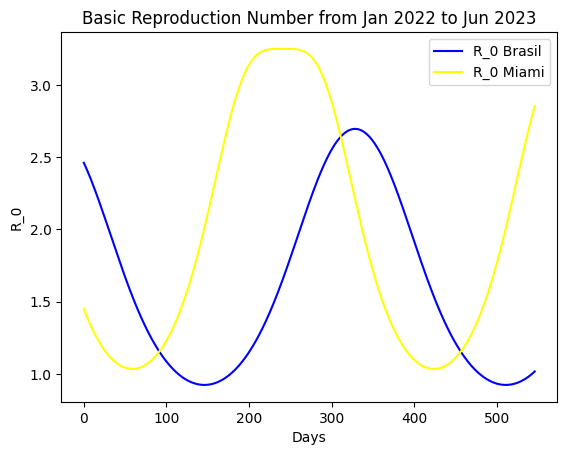

In [61]:
#plt.plot(t,[R_0(t[x],Sh_DFE_Miami,Sm_DFE_Miami(t[x]),NhM,aBM,temp_fun_miami) for x in range(len(t))],label='R_0 Miami',color='purple')
#plt.figsize(10,10)
plt.plot(t,[R_0(t[x],Sh_DFE_Brasil,Sm_DFE_Brasil(t[x]),NhB,temp_fun_br) for x in range(len(t))],label='R_0 Brasil',color='blue')
plt.plot(t,[R_0(t[x],Sh_DFE_Miami,Sm_DFE_Miami(t[x]),NhB,temp_fun_mia) for x in range(len(t))],label='R_0 Miami',color='yellow')

plt.legend()
plt.title('Basic Reproduction Number from Jan 2022 to Jun 2023')
plt.xlabel('Days')
plt.ylabel('R_0')
plt.show()

In [62]:
Sh_DFE_Miami_Global=(mu_h*NhM +aBM*mu_h*NhB/(mu_h+aBM))/(mu_h+aMB - aBM*aMB/(mu_h+aBM))
Sh_DFE_Brasil_Global=(mu_h*NhB+aMB*Sh_DFE_Miami)/(mu_h+aBM)

In [63]:
def Sm_DFE_Miami_Global(t,temp_fun):
    return eta_b(t,temp_fun_mia)/((eta_L(t,temp_fun_mia)+mu_L(t,temp_fun_mia))*mu_m(t,temp_fun_mia)/eta_L(t,temp_fun_mia) + eta_b(t,temp_fun_mia)*mu_m(t,temp_fun_mia)/(eta_L(t,temp_fun_mia)*KM))
def Sm_DFE_Brasil_Global(t,temp_fun):
    return eta_b(t,temp_fun_br)/((eta_L(t,temp_fun_br)+mu_L(t,temp_fun_br))*mu_m(t,temp_fun_br)/eta_L(t,temp_fun_br) + eta_b(t,temp_fun_br)*mu_m(t,temp_fun_br)/(eta_L(t,temp_fun_br)*KB))

In [64]:
def LS_DFE_Miami_Global(t,temp_fun):
    return mu_m(t,temp_fun_mia)*Sm_DFE_Miami_Global(t,temp_fun)/eta_L(t,temp_fun_mia)
def LS_DFE_Brasil_Global(t,temp_fun):
    return mu_m(t,temp_fun_br)*Sm_DFE_Brasil_Global(t,temp_fun)/eta_L(t,temp_fun_br)

In [65]:
def R_0_Global(t,temp_fun1,temp_fun2):
    V=[[v_h+mu_h+aMB,0,0,0,0,0,-aBM,0,0,0,0,0],[(a-1)*v_h,eta_h+mu_h,0,0,0,0,0,0,0,0,0,0],[-a*v_h,0,eta_h+mu_h+aMB,0,0,0,0,0,-aBM,0,0,0],[0,0,0,eta_m+mu_m(t,temp_fun1),0,0,0,0,0,0,0,0],[0,0,0,-eta_m,mu_m(t,temp_fun1),-eta_L(t,temp_fun1),0,0,0,0,0,0],[0,0,0,0,0,eta_L(t,temp_fun1)+mu_L(t,temp_fun1),0,0,0,0,0,0],[-aMB,0,0,0,0,0,v_h+mu_h+aBM,0,0,0,0,0],[0,0,0,0,0,0,(a-1)*v_h,eta_h+mu_h,0,0,0,0],[0,0,-aMB,0,0,0,-a*v_h,0,eta_h+mu_h+aBM,0,0,0],[0,0,0,0,0,0,0,0,0,eta_m+mu_m(t,temp_fun2),0,0],[0,0,0,0,0,0,0,0,0,-eta_m,mu_m(t,temp_fun2),-eta_L(t,temp_fun2)],[0,0,0,0,0,0,0,0,0,0,0,eta_L(t,temp_fun2)+mu_L(t,temp_fun2)]]
    F=[[0,0,0,0,b_m(t,temp_fun1)*beta_mh(t,temp_fun1)*Sh_DFE_Miami_Global/NhM,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,],[0,b_m(t,temp_fun1)*beta_hm(t,temp_fun1)*Sh_DFE_Miami_Global/NhM,b_m(t,temp_fun1)*beta_hm(t,temp_fun1)*Sh_DFE_Miami_Global/NhM,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,p*eta_b(t,temp_fun1)*(1-LS_DFE_Miami_Global(t,temp_fun1)/KM),0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,b_m(t,temp_fun2)*beta_mh(t,temp_fun2)*Sh_DFE_Brasil_Global/NhB,0],[0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,b_m(t,temp_fun2)*beta_hm(t,temp_fun2)*Sh_DFE_Brasil_Global/NhB,b_m(t,temp_fun2)*beta_hm(t,temp_fun2)*Sh_DFE_Brasil_Global/NhB,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,p*eta_b(t,temp_fun2)*(1-LS_DFE_Brasil_Global(t,temp_fun2)/KB),0]]
    Inv_V=np.linalg.inv(V)
    eigenvalues=[np.abs(x) for x in np.linalg.eigvals(np.matmul(F, Inv_V))]
    return np.max(eigenvalues)

In [66]:
#asymptomatic people proportion: 
a=.4

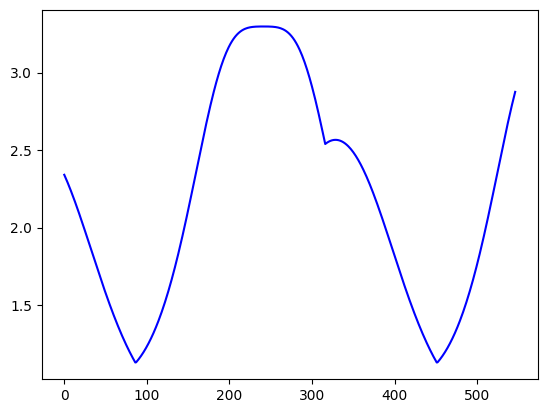

In [67]:
plt.plot(t,[R_0_Global(t,temp_fun_mia,temp_fun_br) for t in time],label='R_0 Brasil',color='blue')